# **Random Forest Classification**

### **Importing All Necessary Libraries**

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

### **Data Framing**

In [84]:
df = pd.read_csv('titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


The given data appears to be a set of passenger records, possibly from the Titanic dataset. Each column represents a different attribute of the passengers. Here’s an explanation of each column:

1. pclass: Passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class). It indicates the socio-economic status of the passenger.
2. survived: Survival indicator (0 = No, 1 = Yes). This column shows whether the passenger survived the disaster.
3. name: Name of the passenger. This typically includes titles and full names.
4. sex: Gender of the passenger (male or female).
5. age: Age of the passenger in years. Some entries might have fractional values (e.g., 0.5 for infants).
6. sibsp: Number of siblings/spouses aboard the Titanic. This indicates how many siblings or spouses the passenger had on the ship.
7. parch: Number of parents/children aboard the Titanic. This indicates how many parents or children the passenger had on the ship.
8. ticket: Ticket number. This is a unique identifier for the passenger’s ticket.
9. fare: Fare paid for the ticket. This is the amount of money the passenger paid for their voyage.
10. cabin: Cabin number. This indicates the cabin where the passenger stayed.
11. embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton). This shows where the passenger boarded the ship.
12. boat: Lifeboat number. If the passenger survived and was rescued by a lifeboat, this indicates which one.
13. body: Body identification number. If the passenger did not survive and their body was recovered, this is an identifier for their body.
14. home.dest: Home/destination. This provides information about the passenger’s home or intended destination.

In [85]:
print(f"data shape: {df.shape}\n") # Checking data shape
print(df.isnull().sum(), "\n") # Checking null values
print(df.describe())

data shape: (1309, 14)

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64 

            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  13

### **Data preprocessing**

Handling Missing Values: Missing values in the "Age" and "fare" column are filled with the median age using Pandas fillna method.

In [86]:
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)

C:\Users\Noor\AppData\Local\Temp\ipykernel_9596\3992704649.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\Noor\AppData\Local\Temp\ipykernel_9596\3992704649.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

### **Removing outliers**

In [87]:
# Remove outliers function
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]


# Apply function to 'age' and 'fare'
df = remove_outliers(df, 'age')
df = remove_outliers(df, 'fare')

### **Encode categorical data**

In [88]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])  # male = 1, female = 0

### **Exploratory Data Analysis (EDA) and Visualization**

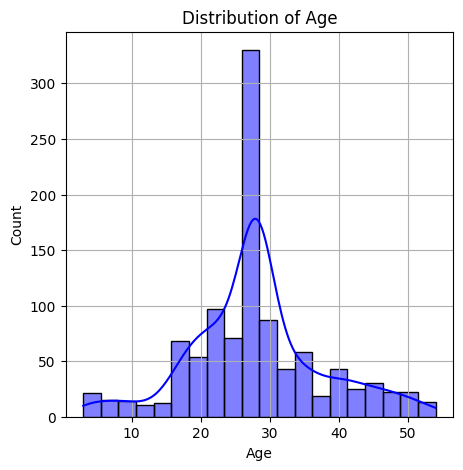

In [89]:
# Distribution of Age
plt.figure(figsize=(5, 5))
sns.histplot(df["age"], bins=20, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

Histogram of Age Distribution: Displays the distribution of passenger ages. It shows the spread of ages among passengers, including a Kernel Density Estimate (KDE) for smoother visualization.

C:\Users\Noor\AppData\Local\Temp\ipykernel_9596\4270580587.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=df, palette='Set1')


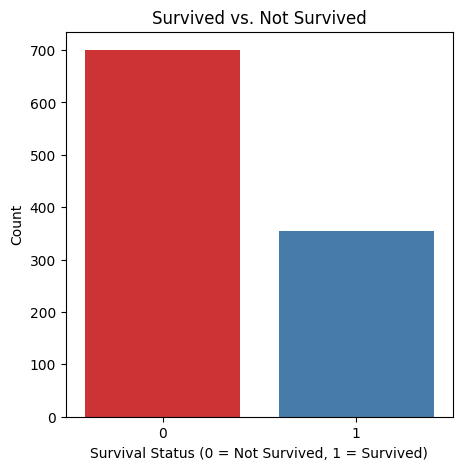

In [90]:
# Countplot of Survived vs. Not Survived
plt.figure(figsize=(5, 5))
sns.countplot(x='survived', data=df, palette='Set1')
plt.title('Survived vs. Not Survived')
plt.xlabel('Survival Status (0 = Not Survived, 1 = Survived)')
plt.ylabel('Count')
plt.show()

Countplot of Survival Status: Shows the count of passengers who survived (Survived = 1) and did not survive (Survived = 0) using Seaborn's countplot function.

<Figure size 500x500 with 0 Axes>

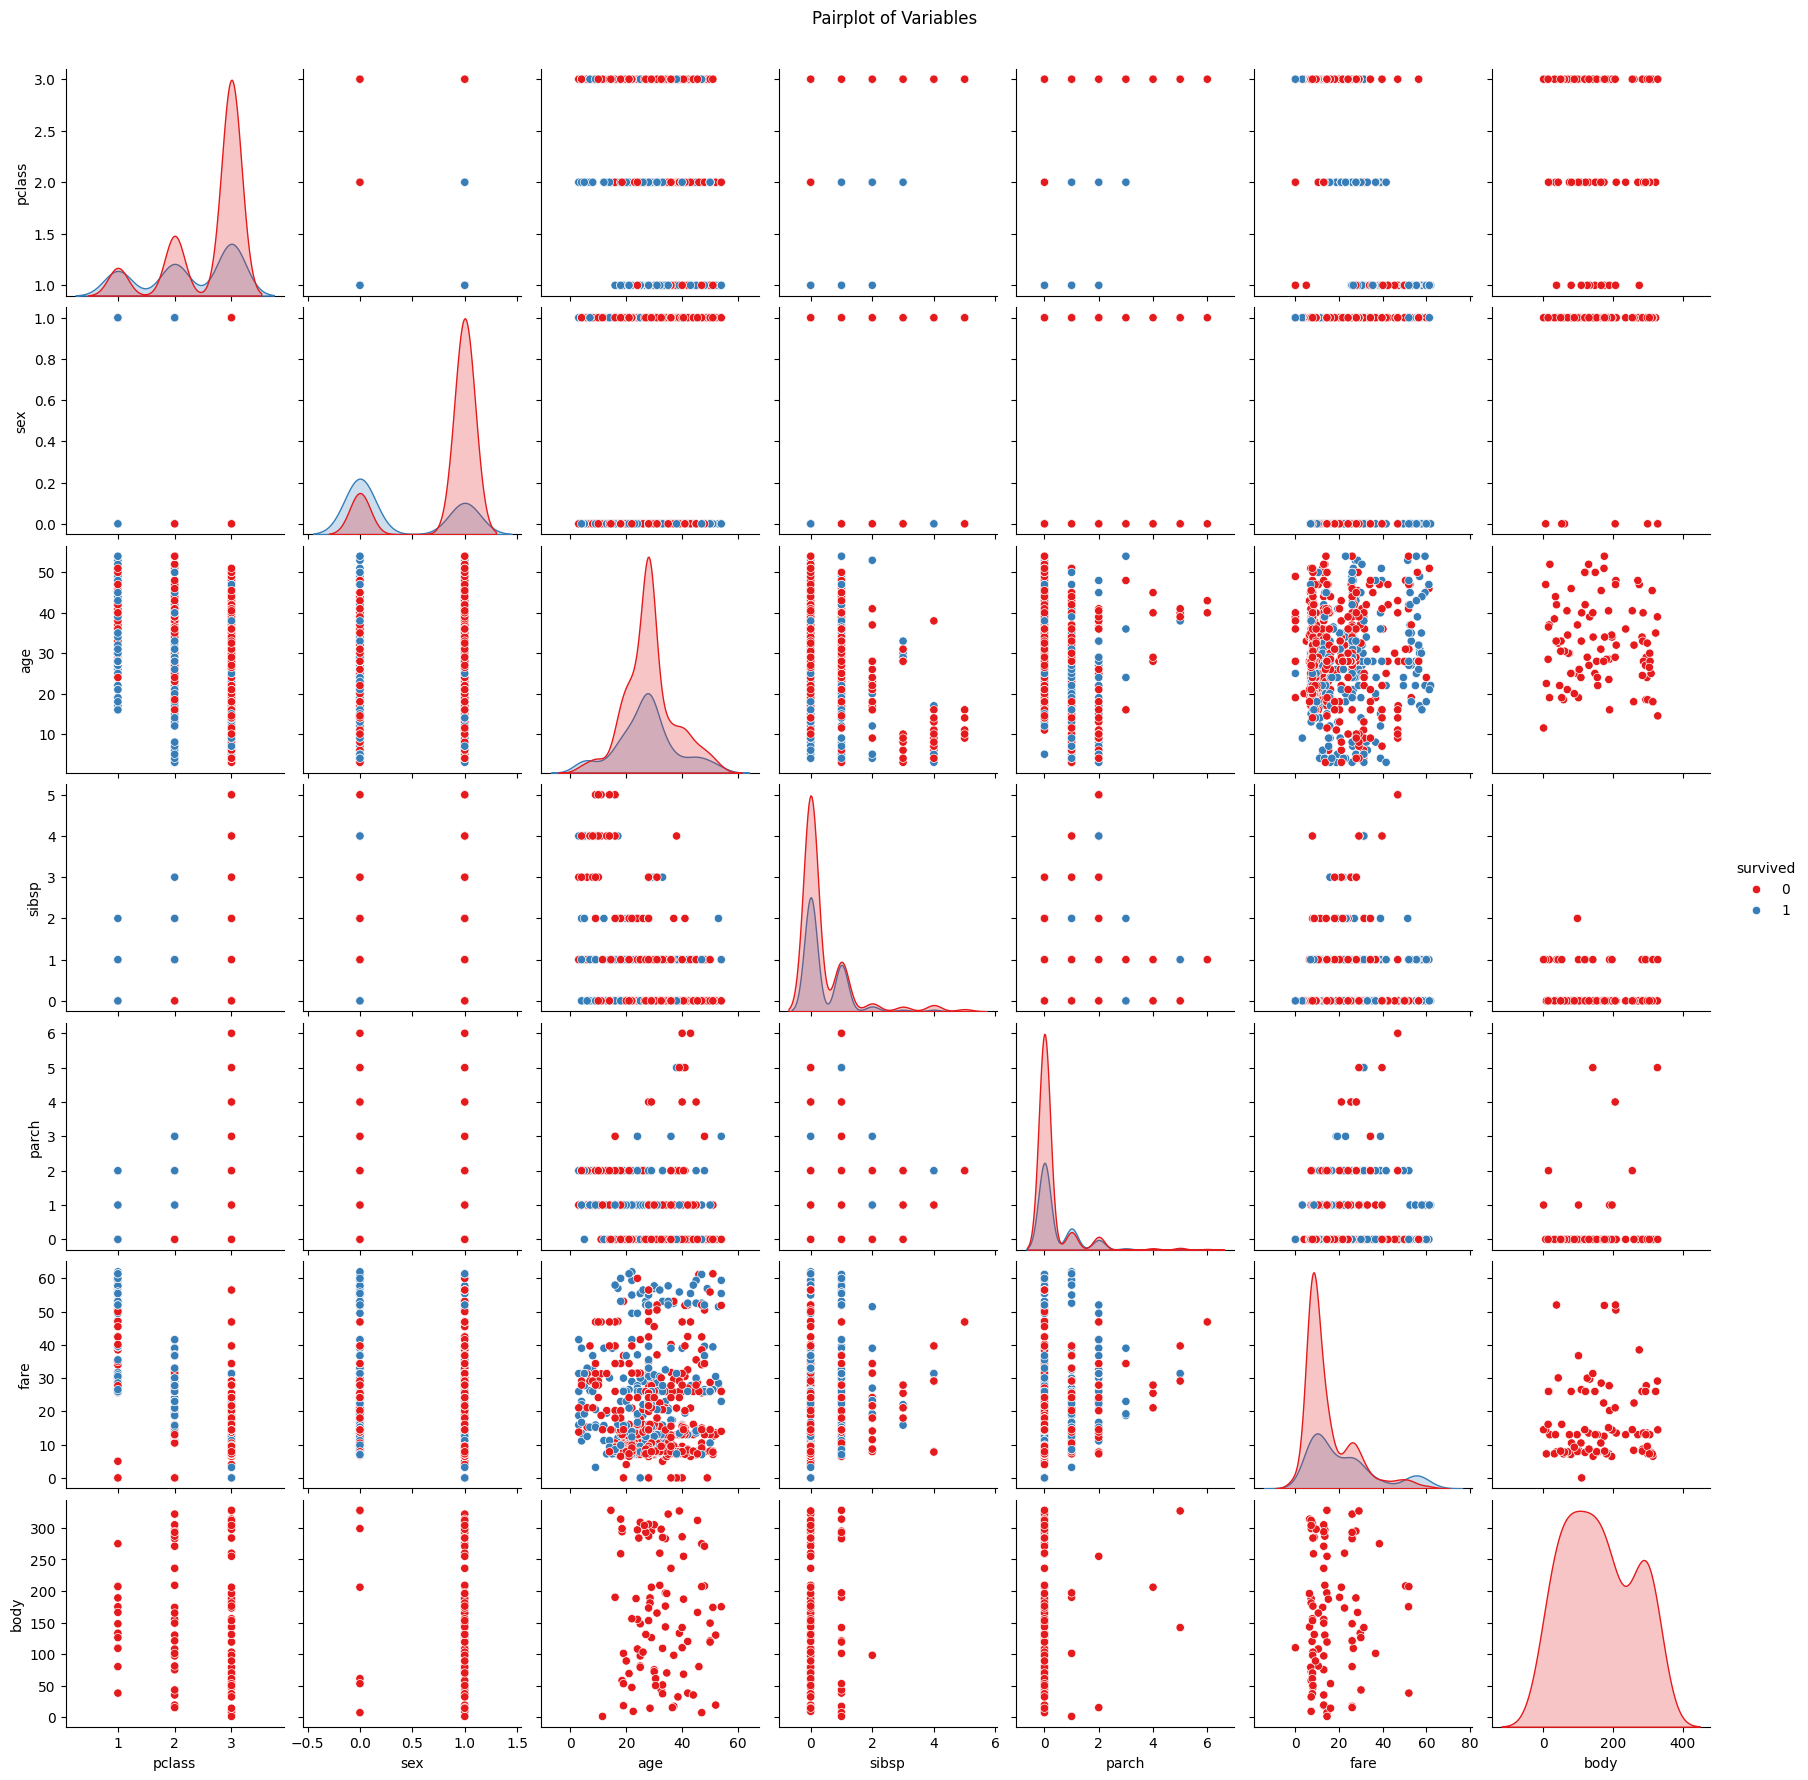

In [91]:
# Pairplot for visualizing relationships
plt.figure(figsize=(5, 5))
sns.pairplot(df, hue='survived', palette='Set1')
plt.suptitle('Pairplot of Variables', y=1.02)
plt.show()

Pairplot: Visualizes pairwise relationships between variables ("Pclass", "Sex", "Age") differentiated by survival status ("Survived"). It helps in understanding how different variables might be related to survival.

### **Advanced Feature Engineering**

In [92]:
df['FamilySize'] = df['sibsp'] + df['parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df['Age*Class'] = df['age'] * df['pclass']
df['Fare_Per_Person'] = df['fare'] / df['FamilySize']

### **Feature Extraction**

In [93]:
# Select features
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'FamilySize', 'IsAlone', 'Age*Class', 'Fare_Per_Person']
X = df[features]
y = df['survived']

### **Splitting the dataset**

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Define Preprocessing Steps**

In [95]:
# Define preprocessing for numeric columns
numeric_features = ['age', 'fare', 'FamilySize', 'Fare_Per_Person', 'Age*Class']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

### **Build a Pipeline**

In [96]:
# Define the Random Forest classifier within a pipeline
rf_clf = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', RandomForestClassifier(random_state=42))])

Random Forest Classifier: The Random Forest classifier (rf_clf) is defined within a pipeline that includes the preprocessing steps.

### **Define Parameter Grid for GridSearchCV**

In [97]:
# Parameter grid for RandomizedSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 300, 400],
    'classifier__max_depth': [None, 10, 20, 30, 40],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['auto', 'sqrt', 'log2']
}

Hyperparameter Tuning: GridSearchCV is used to perform a grid search over specified hyperparameters (param_grid) to find the best combination based on cross-validation (cv=5).

### **Randomized Search Cross-Validation**

In [98]:
# Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(rf_clf, param_grid, n_iter=100, cv=5, verbose=1, random_state=42, n_jobs=-1, scoring='accuracy')
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Noor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
160 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
89 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Noor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Noor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packa

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['age',
                                                                                'fare',
                                                                                'FamilySize',
                                                                                'Fare_Per_Person',
                                                                                'Age*Class'])])),
                                             ('classifier',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'classifier__max_depth': [None, 10, 20,
                                                                  30, 40],
                                        'classifier__max_features': ['auto',
                                                                     'sqrt',
                                                                     'log2'],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': [100, 200,
                                                                     300,
                                                                     400]},
                   random_state=42, scoring='accuracy', verbose=1)

### **Print Best Parameters and Best Score**

In [99]:
# Print best parameters and best score
print("Best Parameters found:")
print(random_search.best_params_)
print("Best Score found:")
print(random_search.best_score_)

Best Parameters found:
{'classifier__n_estimators': 100, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 4, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 10}
Best Score found:
0.6990631163708088


### **Predict on the test data**

In [100]:
y_pred = random_search.best_estimator_.predict(X_test)

y_pred: Predicts the target variable (Survived) for the test set (X_test).

### **Generating Classification Report**

In [101]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.88      0.81       139
           1       0.64      0.42      0.50        72

    accuracy                           0.72       211
   macro avg       0.69      0.65      0.65       211
weighted avg       0.71      0.72      0.70       211



### **Plotting the confusion matrix**

Confusion Matrix:  
 [[122  17]
 [ 42  30]]


<Axes: >

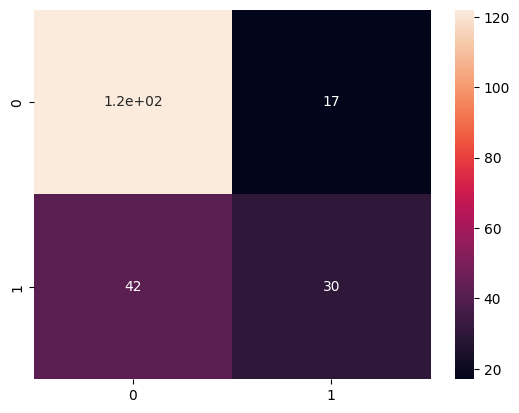

In [102]:
# Confusion Matrix
print("Confusion Matrix: ", "\n", confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)